In [1]:
! pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
nf = pd.read_pickle('data/normalized.pickle')
nf.head()

# MATLAB easily handles hourly means, but pyplot really struggles with that.
# Here we plot lags over multiple days (30 ~ a month) instead.
hf = nf.resample('D').mean()

## Lag-Lag plots
These are better in MATLAB, pyplot seems to struggle with which objects should be in the foreground, this is evident in lags computed over the hour, as the plots are much busier. MATLAB is also **way** faster.

See the `LagLag.mlx` live notebook. That notebook also produce plots that are interactive ✨.

In [3]:
def laglag(x, lags, colormap='plasma'):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.set_title(x.name)

    # The colormap ranges from 1 to the total number of lags
    norm = mpl.colors.Normalize(vmin=1, vmax=lags)
    cmap = mpl.cm.get_cmap(colormap)
    
    for lag in  range(1, lags):
        ax.scatter(
            xs=lag,                   
            ys=x,                      
            zs=x.shift(lag),
            s=2,                      # Size 2
            c=np.repeat(lag, len(x)), # Color all points on this lag the same
            norm=norm,                # Normalization trategy
            cmap=cmap                 # Selected colormap
        )
        ax.set_xlabel('T')
        ax.set_ylabel('x(t)')
        ax.set_zlabel('x(t + T)')

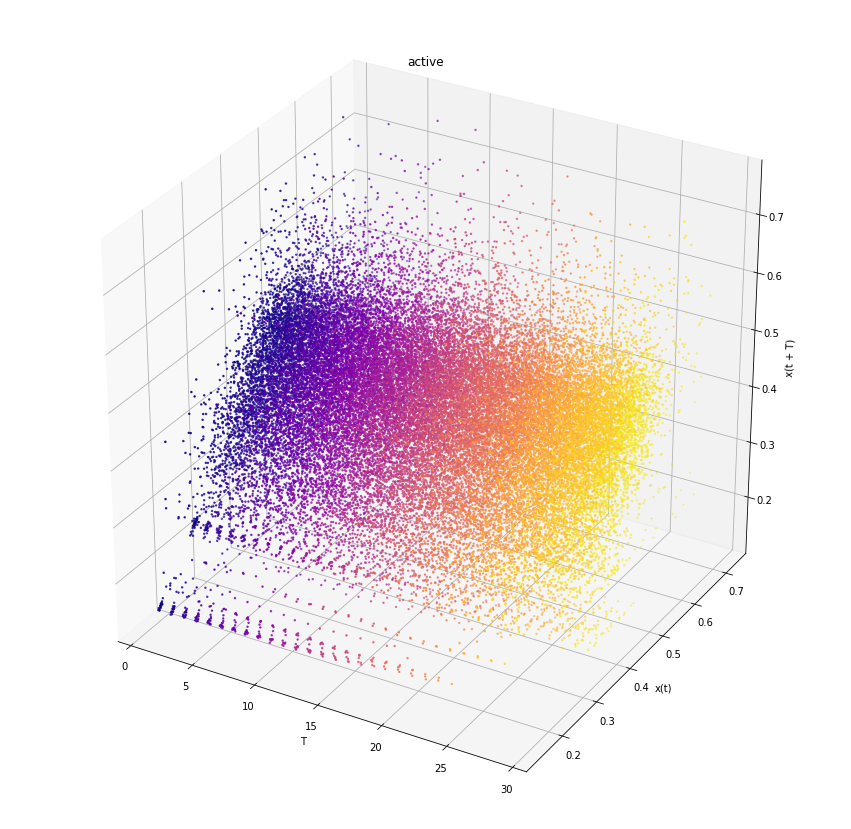

In [4]:
laglag(hf.active, 30)

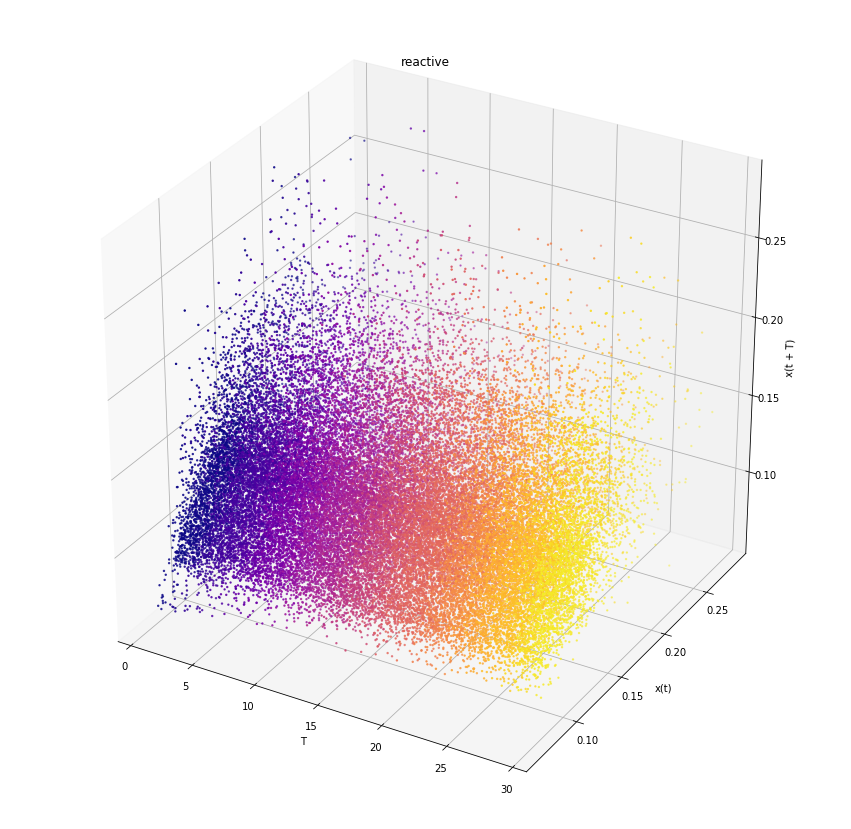

In [5]:
laglag(hf.reactive, 30)

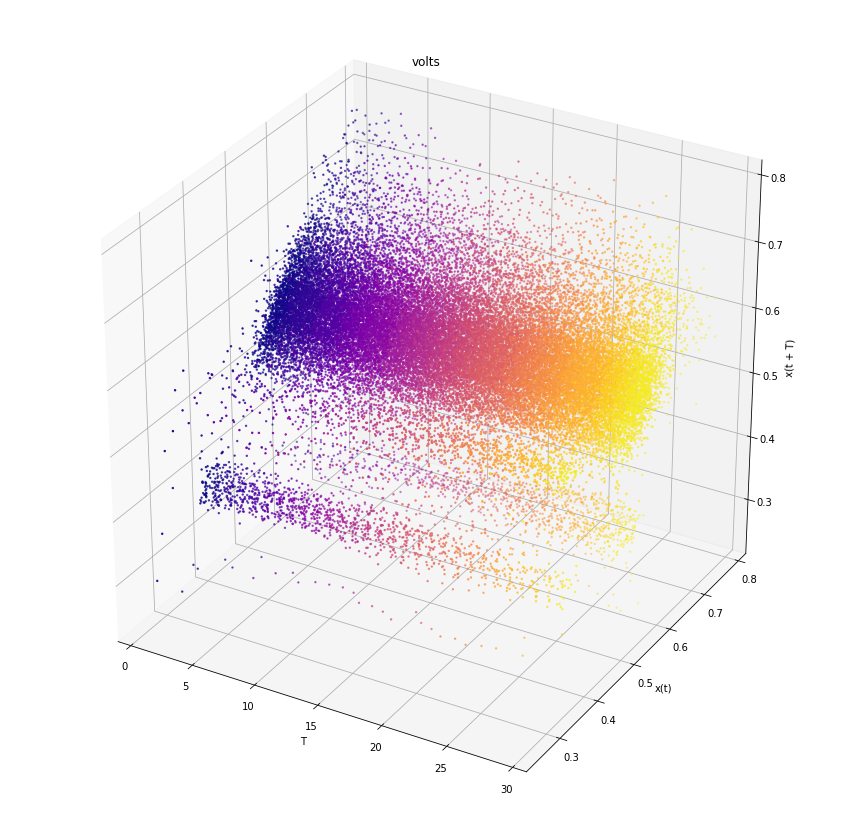

In [6]:
laglag(hf.volts, 30)

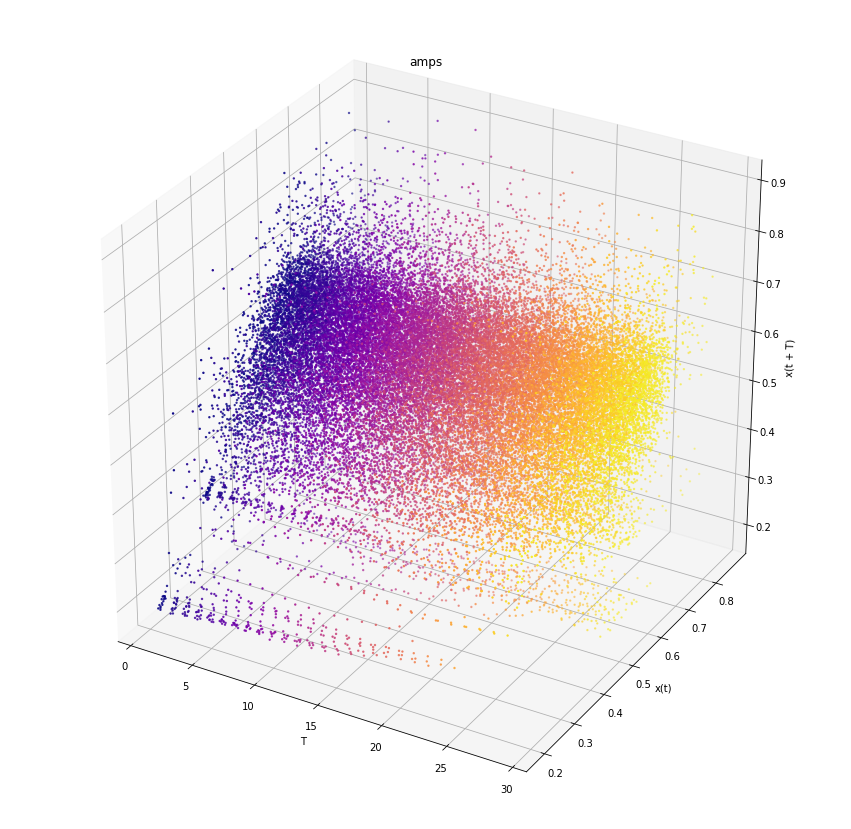

In [7]:
laglag(hf.amps, 30)

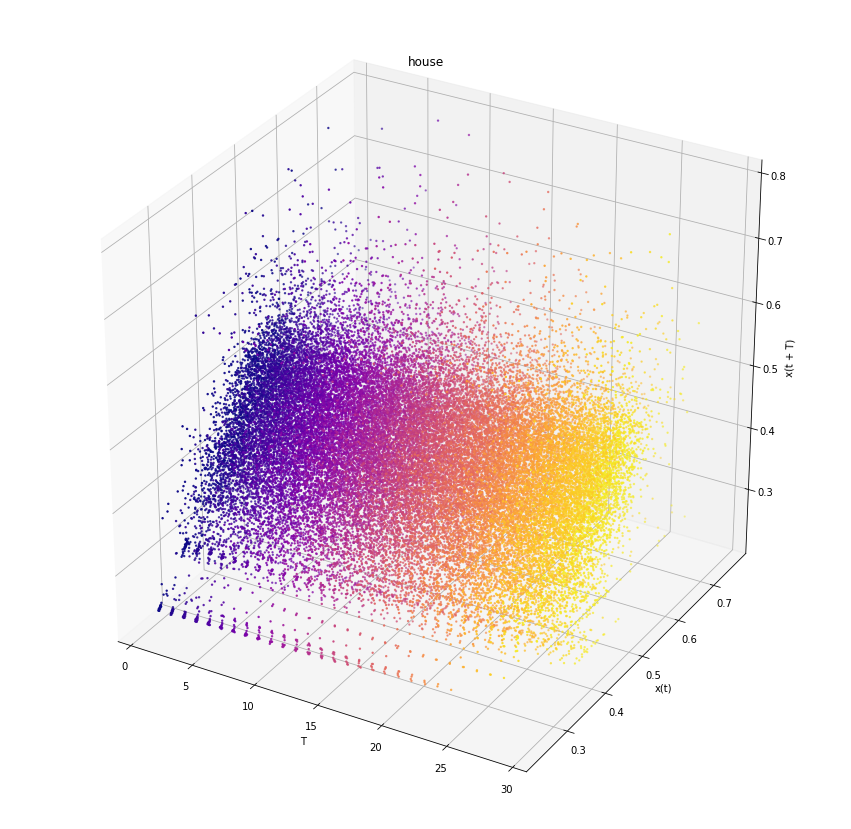

In [8]:
laglag(hf.house, 30)

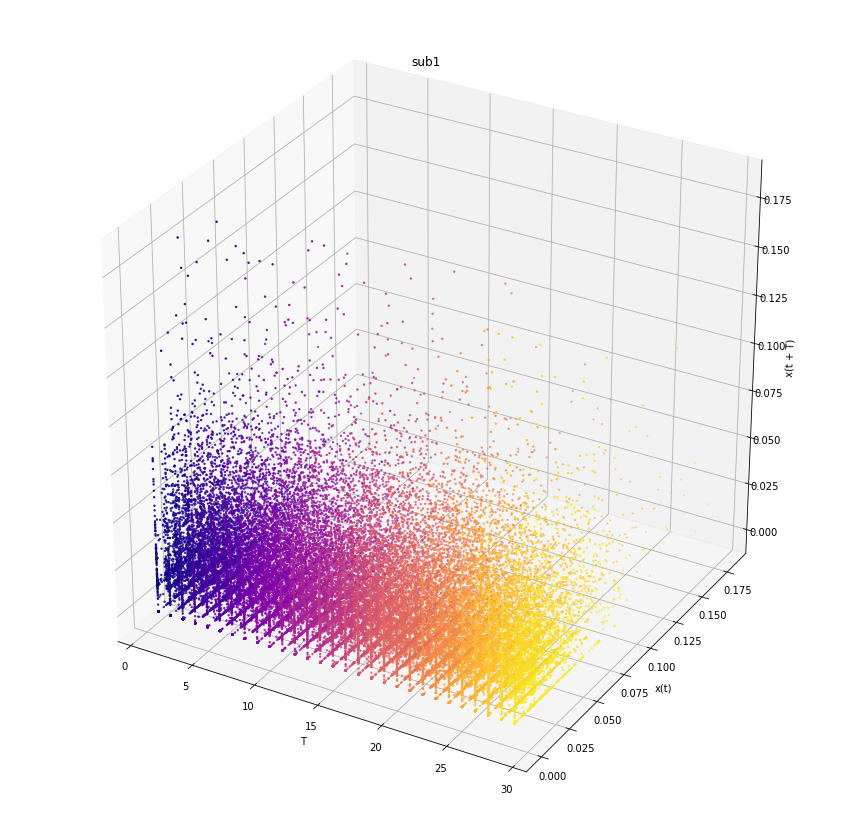

In [9]:
laglag(hf.sub1, 30)

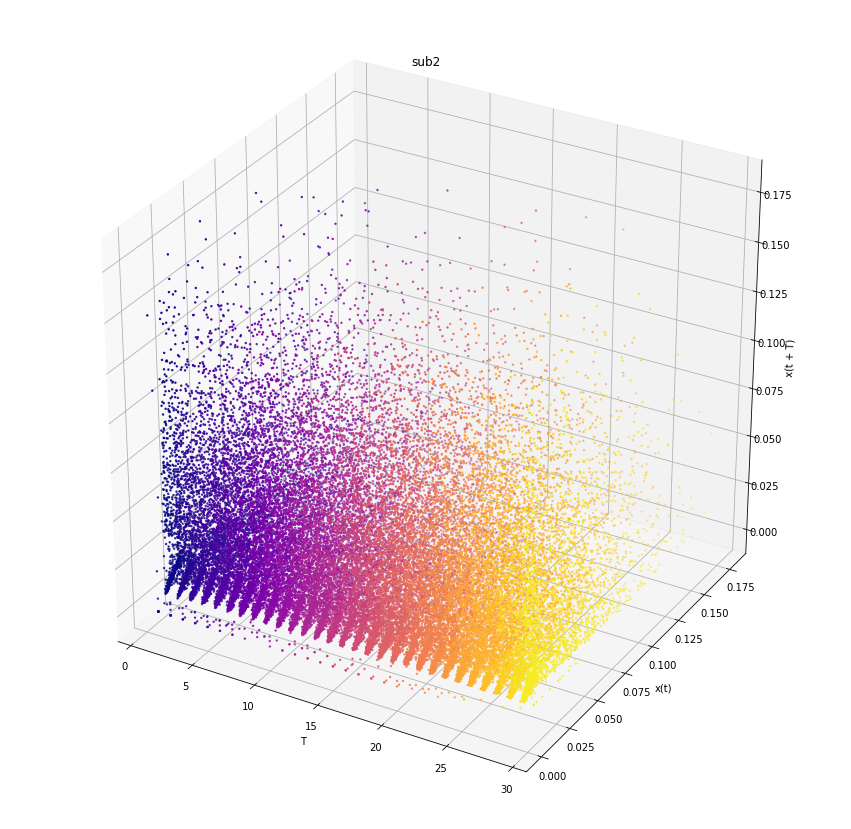

In [10]:
laglag(hf.sub2, 30)

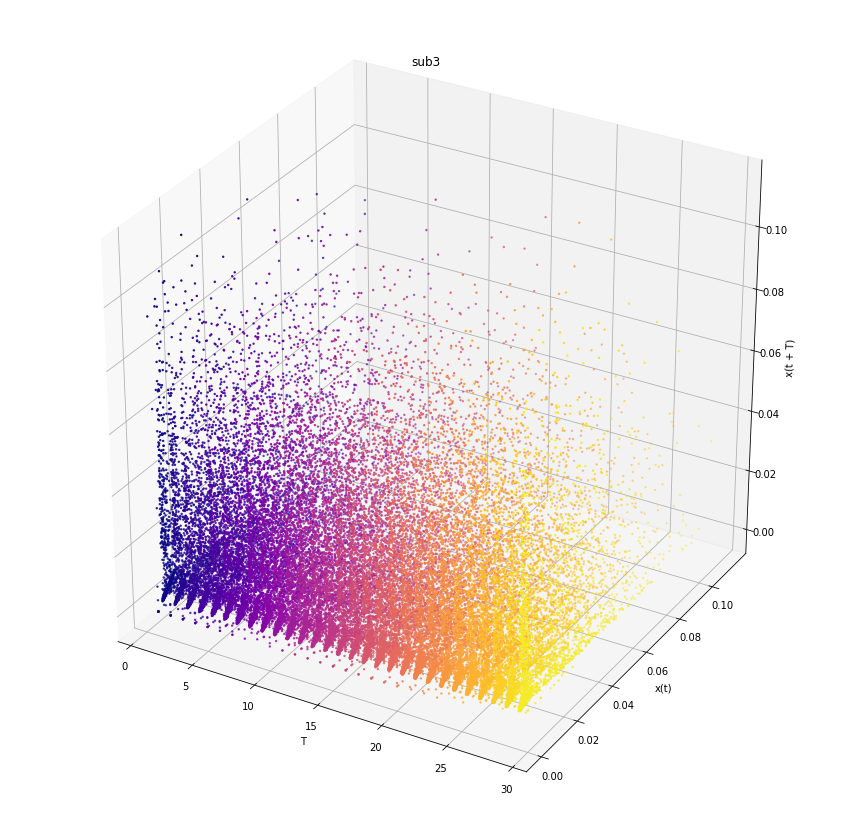

In [11]:
laglag(hf.sub3, 30)